<a href="https://colab.research.google.com/github/enikolaev/AI_in_Professional_Area/blob/main/LabWork_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Утилиты загрузки данных

Подключение библиотеки для доступа к наборам данных

In [ ]:
from sklearn import datasets
import numpy as np

## Готовый набор данных

Получение готового набора данных

In [ ]:
digits = datasets.load_digits()

Получение описания набора данных

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Построение матрицы признаков для данных digits

In [ ]:
features = digits.data
target = digits.target
print('Признаки: ', features.shape)
print('Классы (целевая переменная): ', target.shape)
print('Признаки экземпляра 0\n', features[0])
print('Целевая переменная экземпляра 0\n', target[0])

Признаки:  (1797, 64)
Классы (целевая переменная):  (1797,)
Признаки экземпляра 0
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Целевая переменная экземпляра 0
 0


Выполним визуализацию экземпляров готового набора данных (в виде изображений)

<Figure size 640x480 with 0 Axes>

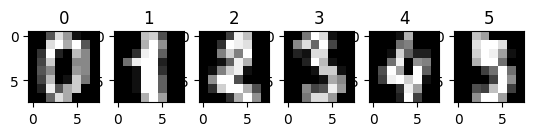

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
N = 6
f, ax = plt.subplots(1,N)
for i in range(N):
  ax[i].imshow(features[i].reshape((8,8)))
  ax[i].set_title(f'{target[i]}')

## Искусственный набор данных

Если в процессе исследования потребовался набор данных для реализации модели регрессии, то необходимо использовать `make_regression`

In [ ]:
features, target, coefficients = datasets.make_regression(
    n_samples=100,
    n_features=3,
    n_informative=3,
    n_targets=1,
    noise=0.0,
    coef=True, random_state=1)

Выводим матрицу признаков и вектор целевых переменных (первые 5 экземпляров)

In [ ]:
print('Матрица признаков:\n', features[:5])
print('Целевой вектор:\n', target[:5])

Матрица признаков:
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]
 [ 0.12910158  0.50274088  1.6169496 ]
 [-0.69166075 -0.6871727  -0.39675353]]
Целевой вектор:
 [ -10.37865986   25.5124503    19.67705609  149.50205427 -121.65210879]


Выполним визуализацию

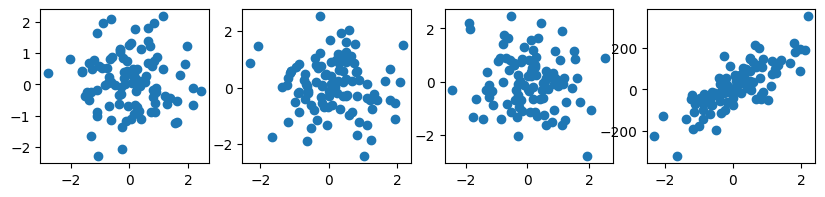

In [ ]:
X = features[:,0]
Y = features[:,1]
Z = features[:,2]
f, ax = plt.subplots(1,4,figsize=(10,2))
ax[0].scatter(X, Y)
ax[1].scatter(Y, Z)
ax[2].scatter(Z, X)
ax[3].scatter(Y, target)

На представленных графиках преддставлены проекции точек в трехмерном пространстве, а также (последний график) - зависимость целевой переменной от признака Y

## Сложный набор готовых данных

Пример использования утилиты `fetch_olivetti_faces`

Получение данных

In [ ]:
faces = datasets.fetch_olivetti_faces()
print(type(faces))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
print(faces.data.shape)
faces_data = faces.data # матрица признаков (фото)
faces_target = faces.target # вектор целевых переменных
print(faces_data[0])
print(faces_target[0])

(400, 4096)
[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
0


Визуализация (несколько случайных экземпляров)

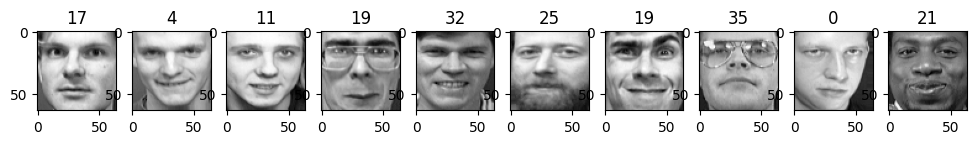

In [ ]:
N = 10
f, ax = plt.subplots(1,N,figsize=(12,4))
np.random.seed(0)
for i in range(N):
  rand_i = np.random.randint(400)
  ax[i].imshow(faces_data[rand_i].reshape((64,64)))
  ax[i].set_title(f'{faces_target[rand_i]}')